In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)


In [2]:
data = pd.read_csv('D:/Python_CSV/Anapa_flights.csv')
data

,flight_id,flight_no,aircraft_code,departure_airport,arrival_airport,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,flight_time,economy_count,economy_income,business_count,business_income,total_count,total_income,fuel_consumption,fuel_cost,revenue
0,136119,PG0252,733,AAQ,SVO,2017-01-03T10:05:00Z,2017-01-03T10:08:00Z,2017-01-03T11:45:00Z,2017-01-03T11:49:00Z,1.68,102.00,1250400.00,11.00,402600.00,113.00,1653000.00,3.52,145781.24,1507218.76
1,136120,PG0252,733,AAQ,SVO,2017-02-24T10:05:00Z,2017-02-24T10:07:00Z,2017-02-24T11:45:00Z,2017-02-24T11:46:00Z,1.65,98.00,1202800.00,11.00,402600.00,109.00,1605400.00,3.39,134233.77,1471166.23
2,136122,PG0252,733,AAQ,SVO,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,2017-01-08T11:45:00Z,2017-01-08T11:48:00Z,1.67,87.00,1065000.00,10.00,366000.00,97.00,1431000.00,3.02,125139.65,1305860.35
3,136130,PG0252,733,AAQ,SVO,2017-02-13T10:05:00Z,2017-02-13T10:07:00Z,2017-02-13T11:45:00Z,2017-02-13T11:46:00Z,1.65,97.00,1190600.00,10.00,366000.00,107.00,1556600.00,3.33,131770.76,1424829.24
4,136131,PG0252,733,AAQ,SVO,2017-01-28T10:05:00Z,2017-01-28T10:07:00Z,2017-01-28T11:45:00Z,2017-01-28T11:46:00Z,1.65,112.00,1373600.00,12.00,439200.00,124.00,1812800.00,3.86,159972.33,1652827.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,PG0480,SU9,AAQ,EGO,2017-01-02T09:25:00Z,2017-01-02T09:28:00Z,2017-01-02T10:15:00Z,2017-01-02T10:18:00Z,0.83,73.00,462300.00,9.00,170100.00,82.00,632400.00,1.23,50941.27,581458.73
123,136937,PG0480,SU9,AAQ,EGO,2017-01-03T09:25:00Z,2017-01-03T09:29:00Z,2017-01-03T10:15:00Z,2017-01-03T10:19:00Z,0.83,72.00,456000.00,9.00,170100.00,81.00,626100.00,1.21,50320.03,575779.97
124,136951,PG0480,SU9,AAQ,EGO,2017-02-02T09:25:00Z,2017-02-02T09:28:00Z,2017-02-02T10:15:00Z,2017-02-02T10:17:00Z,0.82,78.00,493800.00,12.00,226800.00,90.00,720600.00,1.35,53371.63,667228.37
125,136953,PG0480,SU9,AAQ,EGO,2017-02-27T09:25:00Z,2017-02-27T09:27:00Z,2017-02-27T10:15:00Z,2017-02-27T10:17:00Z,0.83,85.00,538500.00,12.00,226800.00,97.00,765300.00,1.45,57522.76,707777.24


In [3]:
# Делаем второй датасет, в котором убираем данные о рейсах в Новокузнецк, поскольку о них нет данных
df = data[data.arrival_airport != 'NOZ'].copy()

In [4]:
#Обрабатываем столбец со временем отправления. Достаём даты из текстовых строк
df['actual_departure'] = df['actual_departure'].apply(lambda s: s[:10])
df['actual_departure'] = df['actual_departure'].apply(lambda t: datetime.strptime(t, '%Y-%m-%d'))

In [5]:
# Функция, меняющая номер дня на его название 
def weekday_name(n):
    if n == 0:
        return 'Monday'
    if n == 1:
        return 'Tuesday'
    if n == 2:
        return 'Wednesday'
    if n == 3:
        return 'Thursday'
    if n == 4:
        return 'Friday'
    if n == 5:
        return 'Saturday'
    if n == 6:
        return 'Sunday'
    
# Добавляем столбцы с номером месяца, номером дня и днём недели вылета    
df['month'] = df['actual_departure'].apply(lambda x: x.month)
df['day'] = df['actual_departure'].apply(lambda y: y.day)
df['weekday'] = df['actual_departure'].apply(lambda z: z.weekday())
df['weekday'] = df['weekday'].apply(weekday_name)
df['week'] = df['actual_departure'].apply(lambda z: z.isocalendar()[1])
df['week'][df['week'] == 52] = 1

<ipython-input-5-0bd88cabe96b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'][df['week'] == 52] = 1


In [6]:
# Разделяем датасет на два для разных самолётов
df_SU = df[df['aircraft_code'] == 'SU9'].copy()
df_733 = df[df['aircraft_code'] == '733'].copy()

## Первый способ отбора рейсов.
Самый простой. Отменяем все рейсы ниже какого-то значения прибыльности. Например, рейсы, выручка которых меньше 0.95 от средней выручки по всем рейсам в этот город.

In [7]:
#Рейсы Boeing 737-300
df_733[df_733['revenue'] < 0.95 * df_733['revenue'].mean()][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
2,136122,733,2017-01-08,1305860.35
12,136178,733,2017-01-29,1306880.16
14,136185,733,2017-01-14,1385829.66
15,136202,733,2017-01-05,1366590.06
16,136204,733,2017-02-23,1326029.24
21,136250,733,2017-02-08,1285881.26
28,136282,733,2017-01-16,1382049.46
33,136320,733,2017-02-19,1413860.74
35,136345,733,2017-01-24,1378269.26
38,136360,733,2017-02-05,1335944.26


In [8]:
#Рейсы Sukhoi Superjet-100
df_SU[df_SU['revenue'] < 0.95 * df_SU['revenue'].mean()][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
72,136609,SU9,2017-01-08,588979.97
74,136620,SU9,2017-02-17,566651.57
77,136642,SU9,2017-01-30,491240.96
78,136645,SU9,2017-01-05,582058.73
83,136666,SU9,2017-02-09,612907.42
86,136678,SU9,2017-01-28,581501.20
96,136767,SU9,2017-01-23,599737.50
102,136807,SU9,2017-02-23,490674.77
105,136823,SU9,2017-02-05,574144.59
107,136838,SU9,2017-01-24,616773.79


Определённое значение прибыльности можно установить только получения всей информации о затратах и прибыли от полёта.

## Второй способ отбора рейсов
Разбивка рейсов по конкретным дням недели и отмена самых неприбыльных в конкретные дни

Рейсы Boeing 737-300

<AxesSubplot:xlabel='weekday', ylabel='revenue'>

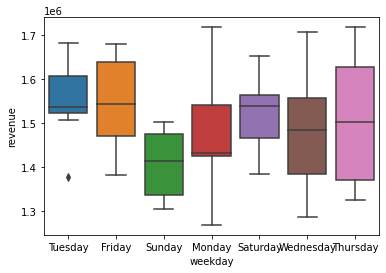

In [9]:

sns.boxplot(x = 'weekday', y = 'revenue', data = df_733)

In [10]:
#В первую очередь необходимо отменить рейс во вторник, являющийся явным выбросом
Tuesday = df_733[df_733['weekday'] == 'Tuesday']
Tuesday[Tuesday['revenue'] == Tuesday['revenue'].min()][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
35,136345,733,2017-01-24,1378269.26


Как мы видим, самые неприбыльные дни - воскресенье и понедельник. Кроме того, очень большой разброс по доходности в среду и четверг. Можно отменить рейсы в эти дни, которые дают доход меньше какого-то значения. Для примера, в воскресенье меньше медианы, в среду и четверг меньше 1-го квартиля.

In [11]:
Sunday = df_733[df_733['weekday'] == 'Sunday']
Sunday[Sunday['revenue'] < Sunday['revenue'].describe()['50%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
2,136122,733,2017-01-08,1305860.35
12,136178,733,2017-01-29,1306880.16
38,136360,733,2017-02-05,1335944.26
45,136420,733,2017-01-01,1407829.66


In [12]:
Wednesday = df_733[df_733['weekday'] == 'Wednesday']
Wednesday[Wednesday['revenue'] < Wednesday['revenue'].describe()['25%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
21,136250,733,2017-02-08,1285881.26
40,136383,733,2017-01-25,1356449.46


In [13]:
Thursday = df_733[df_733['weekday'] == 'Thursday']
Thursday[Thursday['revenue'] < Thursday['revenue'].describe()['25%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
15,136202,733,2017-01-05,1366590.06
16,136204,733,2017-02-23,1326029.24


Рейсы Sukhoi Superjet-100

<AxesSubplot:xlabel='weekday', ylabel='revenue'>

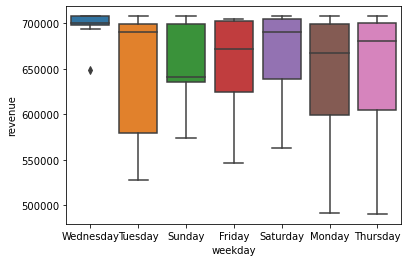

In [14]:
sns.boxplot(x = 'weekday', y = 'revenue', data = df_SU)

In [15]:
#Отменяем рейс в среду, являющийся явным выбросом
Wednesday_SU = df_SU[df_SU['weekday'] == 'Wednesday']
Wednesday_SU[Wednesday_SU['revenue'] == Wednesday_SU['revenue'].min()][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
110,136855,SU9,2017-01-11,648252.56


In [16]:
# В остальные дни можно отменить рейсы, прибыльность которых меньше 1-го квартиля
Tuesday_SU = df_SU[df_SU['weekday'] == 'Tuesday']
Tuesday_SU[Tuesday_SU['revenue'] < Tuesday_SU['revenue'].describe()['25%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
109,136844,SU9,2017-02-28,528251.57
123,136937,SU9,2017-01-03,575779.97


In [17]:
Sunday_SU = df_SU[df_SU['weekday'] == 'Sunday']
Sunday_SU[Sunday_SU['revenue'] < Sunday_SU['revenue'].describe()['25%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
72,136609,SU9,2017-01-08,588979.97
105,136823,SU9,2017-02-05,574144.59


In [18]:
Friday_SU = df_SU[df_SU['weekday'] == 'Friday']
Friday_SU[Friday_SU['revenue'] < Friday_SU['revenue'].describe()['25%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
74,136620,SU9,2017-02-17,566651.57
116,136887,SU9,2017-01-20,546743.67


In [19]:
Saturday_SU = df_SU[df_SU['weekday'] == 'Saturday']
Saturday_SU[Saturday_SU['revenue'] < Saturday_SU['revenue'].describe()['25%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
86,136678,SU9,2017-01-28,581501.20
120,136922,SU9,2017-02-11,562730.62


In [20]:
Monday_SU = df_SU[df_SU['weekday'] == 'Monday']
Monday_SU[Monday_SU['revenue'] < Monday_SU['revenue'].describe()['25%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
77,136642,SU9,2017-01-30,491240.96
122,136936,SU9,2017-01-02,581458.73


In [21]:
Thursday_SU = df_SU[df_SU['weekday'] == 'Thursday']
Thursday_SU[Thursday_SU['revenue'] < Thursday_SU['revenue'].describe()['25%']][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']]

,flight_id,aircraft_code,actual_departure,revenue
78,136645,SU9,2017-01-05,582058.73
102,136807,SU9,2017-02-23,490674.77


## Третий способ отбора рейсов

Такой же, как и второй, только сортировка идёт по номеру недели в году. Будем отменять самые неприбыльные рейсы в течение каждой недели. Допустим, отменим все рейсы, доход от которых ниже первого квартиля.

Рейсы Boeing 737-300

<AxesSubplot:xlabel='week', ylabel='revenue'>

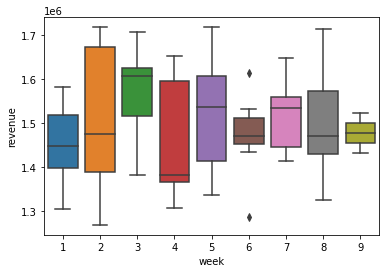

In [22]:
sns.boxplot(x = 'week', y = 'revenue', data = df_733)

In [23]:
# Вспомогательная таблица, считающая 1-й квантиль для каждой недели
W_733 = df_733.groupby(['week'])['revenue'].quantile(0.25)
W_733

week
1   1397519.76
2   1390174.71
3   1516748.46
4   1367359.36
5   1414481.99
6   1452281.99
7   1446797.74
8   1429113.49
9   1455950.48
Name: revenue, dtype: float64

In [24]:
# Рейсы, прибыль от которых меньше 1-го квартиля
for i in W_733.index:
    display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])

<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
2,136122,733,2017-01-08,1305860.35
15,136202,733,2017-01-05,1366590.06


<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
14,136185,733,2017-01-14,1385829.66
54,136464,733,2017-01-09,1268990.06


<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
28,136282,733,2017-01-16,1382049.46
31,136310,733,2017-01-22,1503258.37


<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
12,136178,733,2017-01-29,1306880.16
40,136383,733,2017-01-25,1356449.46


<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
38,136360,733,2017-02-05,1335944.26
58,136486,733,2017-02-02,1373629.24


<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
21,136250,733,2017-02-08,1285881.26
34,136322,733,2017-02-06,1434597.74


<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
3,136130,733,2017-02-13,1424829.24
33,136320,733,2017-02-19,1413860.74


<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
16,136204,733,2017-02-23,1326029.24
37,136351,733,2017-02-26,1426092.24


<ipython-input-24-0ac0913e0181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_733[df_733['week'] == i][df_733['revenue'] < W_733[i]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
23,136266,733,2017-02-27,1433397.74


Рейсы Sukhoi Superjet-100

<AxesSubplot:xlabel='week', ylabel='revenue'>

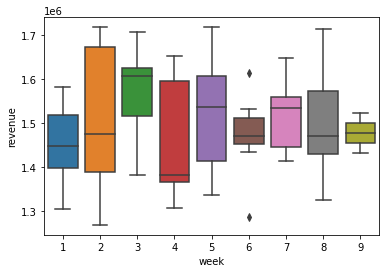

In [25]:
sns.boxplot(x = 'week', y = 'revenue', data = df_733)

In [26]:
# Вспомогательная таблица, считающая 1-й квантиль для каждой недели
W_SU = df_SU.groupby(['week'])['revenue'].quantile(0.25)
W_SU

week
1   581908.73
2   668128.24
3   696522.06
4   608255.65
5   620686.48
6   625207.42
7   643514.40
8   643814.40
9   573132.99
Name: revenue, dtype: float64

In [27]:
# Рейсы, прибыль от которых меньше 1-го квартиля
for j in W_SU.index:
    display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])

<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
122,136936,SU9,2017-01-02,581458.73
123,136937,SU9,2017-01-03,575779.97


<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
88,136709,SU9,2017-01-15,635652.56
110,136855,SU9,2017-01-11,648252.56


<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
84,136669,SU9,2017-01-17,693682.68
116,136887,SU9,2017-01-20,546743.67


<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
86,136678,SU9,2017-01-28,581501.20
96,136767,SU9,2017-01-23,599737.50


<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
77,136642,SU9,2017-01-30,491240.96
105,136823,SU9,2017-02-05,574144.59


<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
83,136666,SU9,2017-02-09,612907.42
120,136922,SU9,2017-02-11,562730.62


<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
74,136620,SU9,2017-02-17,566651.57
117,136888,SU9,2017-02-14,579251.57


<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
81,136660,SU9,2017-02-20,625507.42
102,136807,SU9,2017-02-23,490674.77


<ipython-input-27-e120290072db>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(df_SU[df_SU['week'] == j][df_SU['revenue'] < W_SU[j]][['flight_id', 'aircraft_code', 'actual_departure', 'revenue']])


,flight_id,aircraft_code,actual_departure,revenue
109,136844,SU9,2017-02-28,528251.57


## Итоговая рекомендация

Так как для каждого способа получилось довольно много рейсов для отмены, примем решение отменить только те рейсы, которые были найдены во всех трёх способах.

In [28]:
# Для Boeing 737-300 это следующие рейсы:
Cancel_733 = [
136122,
136178,
136202,
136204,
136250,
136360,
136383
]

# Для Sukhoi Superjet-100 это следующие рейсы:
Cancel_SU = [
136620,
136642,
136678,
136807,
136823,
136887,
136922,
136936,
136937
]


In [29]:
# Создаём таблицу с отменёнными рейсами:
df_cancel = df.copy()
df_cancel

# И убираем из них выбранные рейсы
for n in Cancel_733:
    df_cancel.drop(df_cancel[df_cancel['flight_id'] == n].index, axis = 0, inplace = True)
    
for m in Cancel_SU:
    df_cancel.drop(df_cancel[df_cancel['flight_id'] == m].index, axis = 0, inplace = True)

In [30]:
#Считаем среднюю и медианную прибыльность с рейса начальной таблицы
df.groupby(['aircraft_code'])['revenue'].agg(['mean','median'])

,mean,median
aircraft_code,,
733,1499763.50,1491903.23
SU9,655614.77,689470.26


In [31]:
#Считаем среднюю и медианную прибыльность с рейса итоговой таблицы
df_cancel.groupby(['aircraft_code'])['revenue'].agg(['mean','median'])

,mean,median
aircraft_code,,
733,1523123.31,1526923.64
SU9,674206.91,693682.68
